# Aula 13: Deep Learning

In [1]:
import os
import numpy as np
import pandas as pd

#### Vamos fazer uma analogia de Deep Learning com Regressão

Iremos utilizar uma segunda base de dados (Heart Data) para fazer uma comparação dos dois métodos

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('heart_data.csv')
df = df.drop("Unnamed: 0", axis=1)

In [59]:
print(df.head())

      biking    smoking  heart.disease
0  30.801246  10.896608      11.769423
1  65.129215   2.219563       2.854081
2   1.959665  17.588331      17.177803
3  44.800196   2.802559       6.816647
4  69.428454  15.974505       4.062224


Vamos observar como as variáveis se correlacionam com heart disease

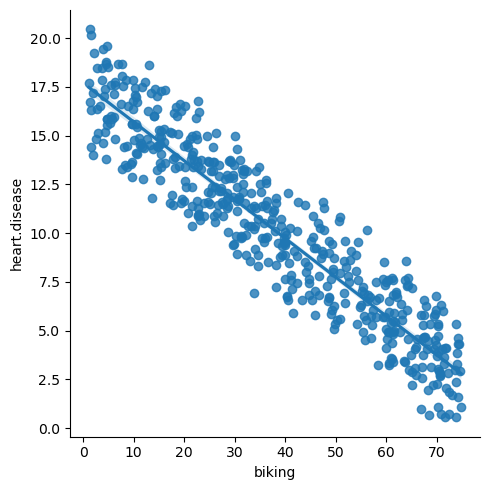

In [4]:
sns.lmplot(x='biking', y='heart.disease', data=df)

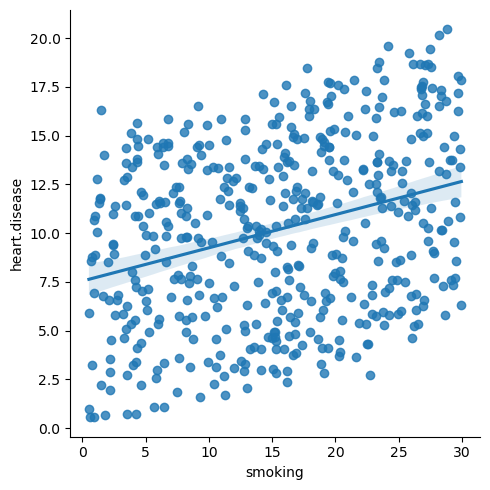

In [7]:
sns.lmplot(x='smoking', y='heart.disease', data=df)

In [5]:
x_df = df.drop('heart.disease', axis=1)

In [7]:
x_df.head()

,biking,smoking
0,30.801246,10.896608
1,65.129215,2.219563
2,1.959665,17.588331
3,44.800196,2.802559
4,69.428454,15.974505


In [6]:
y_df = df['heart.disease']

In [9]:
y_df.head()

0    11.769423
1     2.854081
2    17.177803
3     6.816647
4     4.062224
Name: heart.disease, dtype: float64

Utilizaremos o MinMax Scaler para normalizar nossos dados

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [8]:
scaler.fit(x_df)

MinMaxScaler()

In [12]:
x_df[0:5]

,biking,smoking
0,30.801246,10.896608
1,65.129215,2.219563
2,1.959665,17.588331
3,44.800196,2.802559
4,69.428454,15.974505


In [9]:
x = scaler.transform(x_df)

In [69]:
x[0:5]

array([[0.40226201, 0.35249637],
       [0.86748656, 0.05756838],
       [0.01139089, 0.57994434],
       [0.59198064, 0.07738408],
       [0.92575134, 0.52509129]])

In [14]:
y_df

0      11.769423
1       2.854081
2      17.177803
3       6.816647
4       4.062224
         ...    
493    11.294392
494     9.616762
495    13.495168
496    10.115865
497    11.843556
Name: heart.disease, Length: 498, dtype: float64

In [10]:
y = y_df.to_numpy()

In [72]:
y[0:5]

array([11.76942278,  2.85408148, 17.17780348,  6.81664691,  4.06222352])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

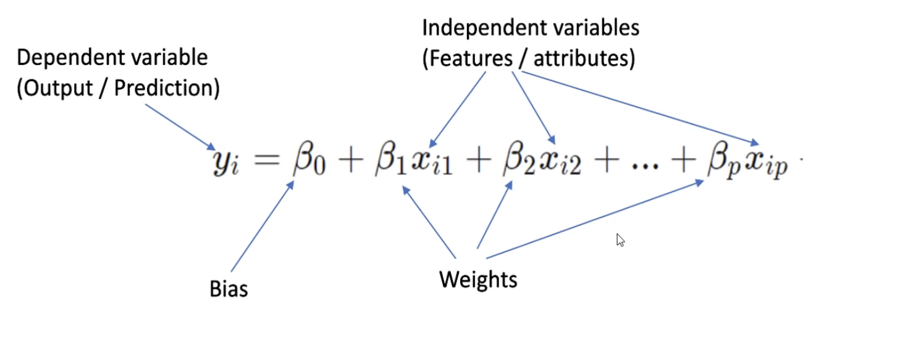

In [21]:
from PIL import Image
i = Image.open("reg1.png")
i = i.resize((900,350))
display(i)

Importar o Linear Model para poder rodar uma regressão

In [75]:
from sklearn import linear_model

In [76]:
model = linear_model.LinearRegression()

In [77]:
model

LinearRegression()

In [78]:
model.fit(X_train,y_train)

LinearRegression()

In [79]:
print(model.score(X_train,y_train))

0.9805244861700972


In [80]:
prediction_test = model.predict(X_test)

In [81]:
print(y_test[0:5], prediction_test[0:5])

[ 6.75601546  9.46602604 14.08865401 13.37742996 16.38467802] [ 5.61039059  9.2448836  15.79321934 13.97495526 17.00509669]


In [82]:
print("Mean Sq. error =", np.mean(prediction_test-y_test)**2)

Mean Sq. error = 0.0014666713508023294


Observar os coeficientes de nossa regressão

In [30]:
print(model.coef_, model.intercept_)

[-14.81400097   5.24488822] 14.886239364884904


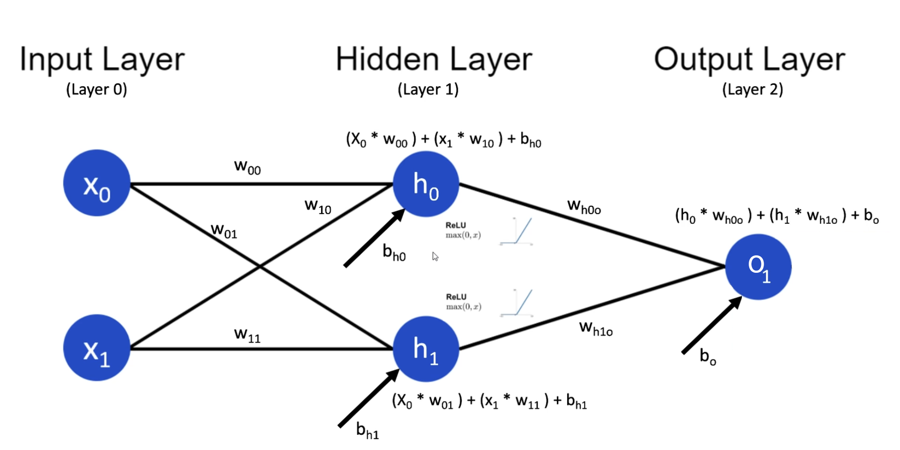

In [31]:
i = Image.open("reg2.png")
i = i.resize((900,450))
display(i)

Podemos cortar a Hidden Layer para montar uma regressão

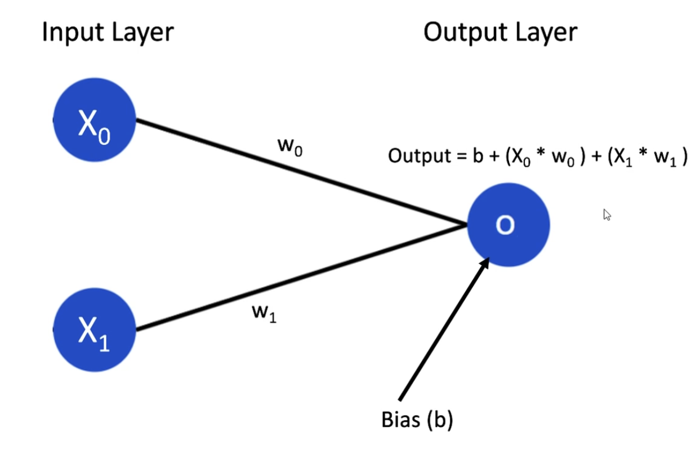

In [53]:
i = Image.open("reg3.png")
i = i.resize((700,450))
display(i)

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Input, InputLayer

In [14]:
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate=0.1)

In [15]:
opt

In [87]:
X_train.shape

(398, 2)

In [16]:
model = Sequential()
model.add(InputLayer(input_shape=(2, )))
model.add(Dense(1))

Metal device set to: Apple M1


2023-01-23 09:54:46.455190: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-23 09:54:46.455868: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [89]:
model

In [17]:
model.compile(loss='mean_squared_error', optimizer=opt)

In [18]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=1)

Epoch 1/50


2023-01-23 09:55:15.454282: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-23 09:55:15.586421: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 0s 12ms/step - loss: 38.6696 - val_loss: 17.4373
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 17.5078 - val_loss: 12.2966
Epoch 3/50
13/13 [==============================] - 0s 6ms/step - loss: 12.1518 - val_loss: 8.4497
Epoch 4/50
 1/13 [=>............................] - ETA: 0s - loss: 9.4515

2023-01-23 09:55:15.781414: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 0s 7ms/step - loss: 8.5640 - val_loss: 6.0801
Epoch 5/50
13/13 [==============================] - 0s 6ms/step - loss: 6.1038 - val_loss: 4.4259
Epoch 6/50
13/13 [==============================] - 0s 6ms/step - loss: 4.4034 - val_loss: 3.1409
Epoch 7/50
13/13 [==============================] - 0s 6ms/step - loss: 3.2305 - val_loss: 2.3292
Epoch 8/50
13/13 [==============================] - 0s 6ms/step - loss: 2.3858 - val_loss: 1.7045
Epoch 9/50
13/13 [==============================] - 0s 5ms/step - loss: 1.8093 - val_loss: 1.3679
Epoch 10/50
13/13 [==============================] - 0s 6ms/step - loss: 1.4132 - val_loss: 1.1192
Epoch 11/50
13/13 [==============================] - 0s 5ms/step - loss: 1.1355 - val_loss: 1.0143
Epoch 12/50
13/13 [==============================] - 0s 5ms/step - loss: 0.9535 - val_loss: 0.7951
Epoch 13/50
13/13 [==============================] - 0s 5ms/step - loss: 0.8022 - val_loss: 0.6800
Epoch 14/50
13/13 [========

In [20]:
prediction_test = model.predict(X_test) 

4/4 [==============================] - 0s 2ms/step


2023-01-23 09:55:40.051889: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [23]:
y_test[0:5]

array([ 6.75601546,  9.46602604, 14.08865401, 13.37742996, 16.38467802])

In [24]:
prediction_test[0:5]

array([[ 5.555584],
       [ 9.197754],
       [15.761916],
       [13.945101],
       [16.969772]], dtype=float32)

In [95]:
print("Mean sq. errror between y_test and predicted =", np.mean(prediction_test-y_test)**2)

Mean sq. errror between y_test and predicted = 0.004426478740864382


In [50]:
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]

In [51]:
print(weights, biases)

[[-14.830063 ]
 [  5.2288175]] [14.852936]


In [96]:
history.history

{'loss': [39.92713928222656,
  18.064163208007812,
  12.467521667480469,
  8.777815818786621,
  6.190516948699951,
  4.452108383178711,
  3.2659642696380615,
  2.4145944118499756,
  1.836447834968567,
  1.4375418424606323,
  1.144037127494812,
  0.9467859864234924,
  0.805998682975769,
  0.6948162317276001,
  0.6234446167945862,
  0.5684197545051575,
  0.5323514938354492,
  0.5025050044059753,
  0.4788895845413208,
  0.46856194734573364,
  0.45700573921203613,
  0.4452863335609436,
  0.43979591131210327,
  0.4364405870437622,
  0.432902455329895,
  0.42956259846687317,
  0.4289790987968445,
  0.4248181879520416,
  0.42554837465286255,
  0.42434361577033997,
  0.4275416433811188,
  0.422114759683609,
  0.4233054518699646,
  0.42051488161087036,
  0.4221542477607727,
  0.421303391456604,
  0.4228200912475586,
  0.42026761174201965,
  0.4204294681549072,
  0.4247904121875763,
  0.42340099811553955,
  0.42347830533981323,
  0.4196327328681946,
  0.42216330766677856,
  0.4218936562538147,
 

In [97]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

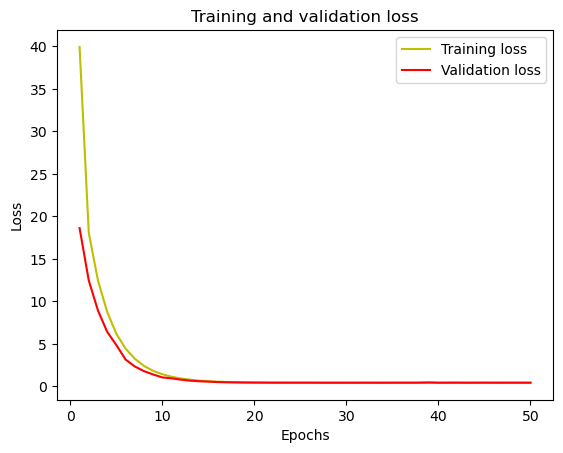

In [98]:
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Quando precisamos Hidden Layers?

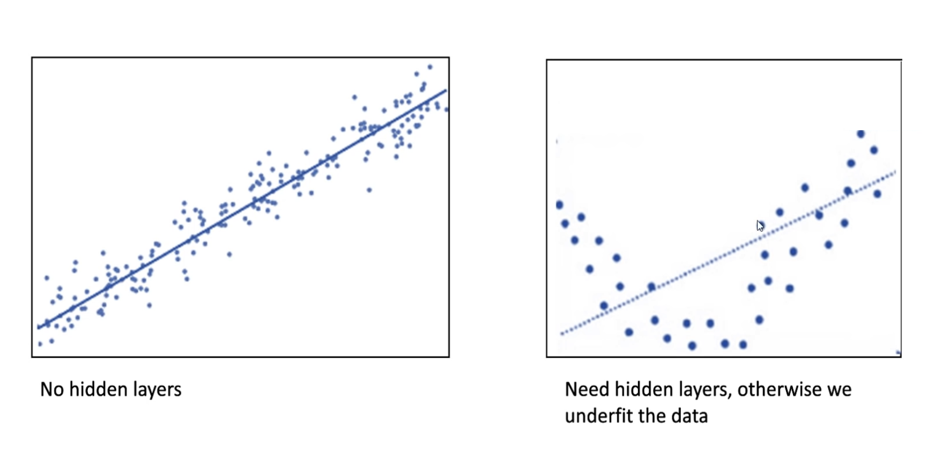

In [75]:
i = Image.open("reg4.png")
i = i.resize((950,450))
display(i)

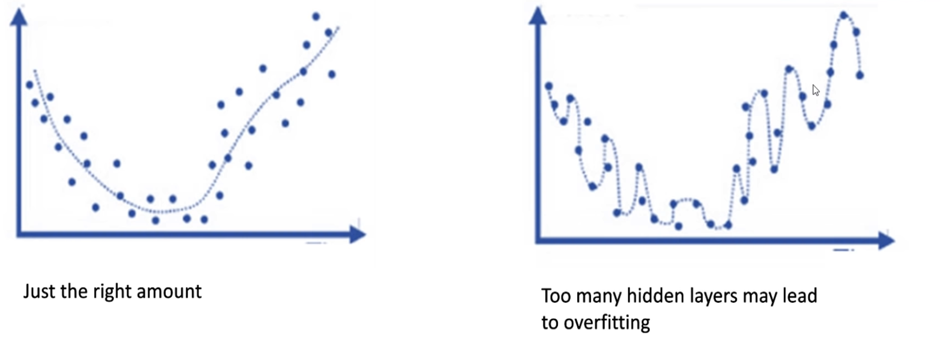

In [77]:
i = Image.open("reg5.png")
i = i.resize((950,350))
display(i)